<a href="https://colab.research.google.com/github/irfanc/TelcomProject/blob/master/Irfan_Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TODO :: 
EDA
Modularization
Hyperparamerization on selected model

In [ ]:
########################################### IMPORT ALL THE REQUIRED LIBRARIES ###########################################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error , r2_score, accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from xgboost import plot_importance
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.neural_network import MLPClassifier
from IPython.display import Audio
import scipy 
sound_file ="Neene Modalu.mp3"
import time

In [ ]:
# from google.colab import drive
# import os
# drive.mount('/gdrive')
# # %cd /gdrive
# print( os.getcwd())

In [ ]:
col = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations", "num_shells","num_access_files","num_outbound_cmds","is_hot_login", "is_guest_login","_count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]
df = pd.read_csv("Train.txt",names = col)
df_test = pd.read_csv("Test.txt",names = col)

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


## *Check for Missing Values*

In [ ]:
def plt_missing_value_percentage(DF , title):
    plt.figure ( figsize = (15,5))
    print(DF.isnull().sum()*100/len(DF))
    ax = sns.heatmap(data = DF.isna() ,cbar= False, cmap = 'BuPu_r', yticklabels = False)
    ax.set_title(title)
    plt.show()



duration                       0.0
protocol_type                  0.0
service                        0.0
flag                           0.0
src_bytes                      0.0
dst_bytes                      0.0
land                           0.0
wrong_fragment                 0.0
urgent                         0.0
hot                            0.0
num_failed_logins              0.0
logged_in                      0.0
num_compromised                0.0
root_shell                     0.0
su_attempted                   0.0
num_root                       0.0
num_file_creations             0.0
num_shells                     0.0
num_access_files               0.0
num_outbound_cmds              0.0
is_hot_login                   0.0
is_guest_login                 0.0
_count                         0.0
srv_count                      0.0
serror_rate                    0.0
srv_serror_rate                0.0
rerror_rate                    0.0
srv_rerror_rate                0.0
same_srv_rate       

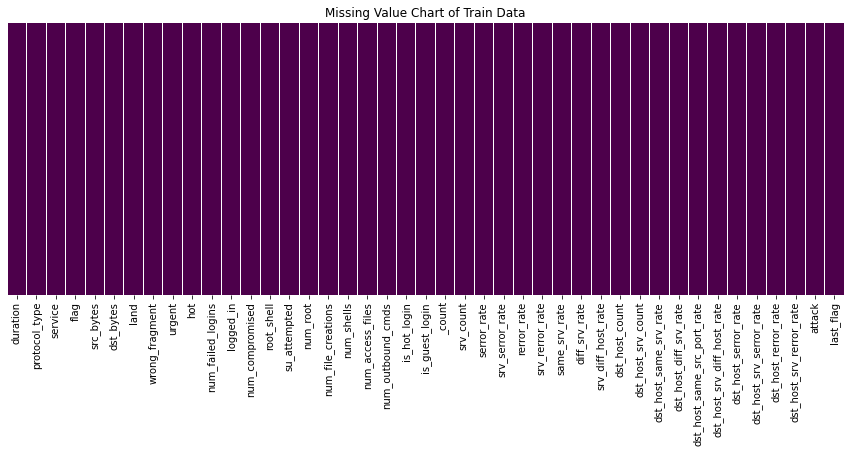

duration                       0.0
protocol_type                  0.0
service                        0.0
flag                           0.0
src_bytes                      0.0
dst_bytes                      0.0
land                           0.0
wrong_fragment                 0.0
urgent                         0.0
hot                            0.0
num_failed_logins              0.0
logged_in                      0.0
num_compromised                0.0
root_shell                     0.0
su_attempted                   0.0
num_root                       0.0
num_file_creations             0.0
num_shells                     0.0
num_access_files               0.0
num_outbound_cmds              0.0
is_hot_login                   0.0
is_guest_login                 0.0
_count                         0.0
srv_count                      0.0
serror_rate                    0.0
srv_serror_rate                0.0
rerror_rate                    0.0
srv_rerror_rate                0.0
same_srv_rate       

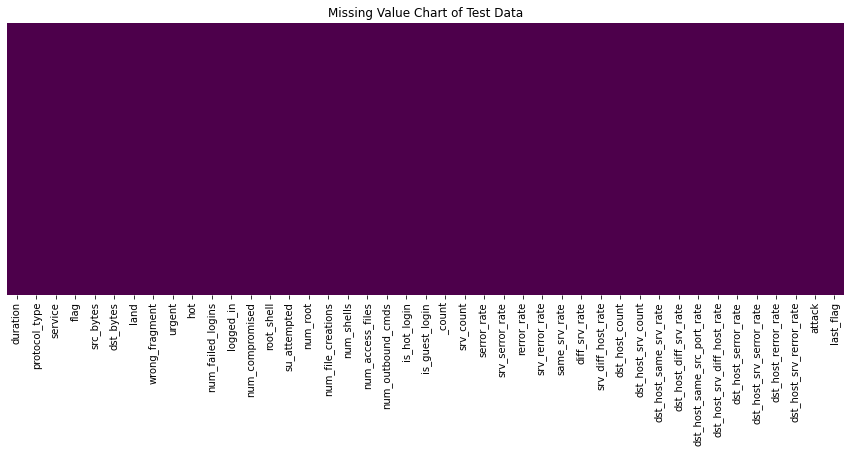

In [ ]:
plt_missing_value_percentage(df, "Missing Value Chart of Train Data")

plt_missing_value_percentage(df_test,"Missing Value Chart of Test Data")


## EDA
######   TBD : EDA of only important features computed in the notebook below

In [ ]:
def autoLabel(ax, fontsize=16):
    for rect in ax.patches:
        height = 0
        width  = 0 
        if (rect.get_height()):
            height = rect.get_height()
            width = rect.get_width()
        ax.text(rect.get_x() + width/2., 1.005*height, str(height), ha='center', va='bottom', fontsize = fontsize)


In [ ]:
df_eda = df.copy()

In [ ]:
def compute_attack_type(x):
    if (x['attack'] == 'normal'):
        return 'no attack'
    return 'attack'

df_eda['attack_type'] = df_eda.apply(lambda x: compute_attack_type(x),axis=1)
df_eda['attack_type'].value_counts()

no attack    67343
attack       58630
Name: attack_type, dtype: int64


### *Attack Class Density*

In [ ]:
def check_attack_class_density(df):
    fig, ax = plt.subplots(2,1,figsize = (20,20))
    fig.suptitle('Target Class distribution', fontsize=50) # Add the text/suptitle to figure

    attack_df = df["attack"].value_counts()[1:]
    l = []
    for x in attack_df :
        if ( x < 10) :
          l.append(0.5)
        elif ( x < 10) :
          l.append(0.4)
        elif ( x < 50) :
          l.append(0.3)
        elif ( x < 1000) :
          l.append(0.1)
        else:
          l.append(0)
    
    explode =  tuple(l)

  # frrequency graph of 'attack'
    sns.countplot('attack', data = df, order= attack_df.index, ax = ax[0])
    ax[0].set_ylabel('# of Attacks', fontsize=18)
    ax[0].set_xlabel('Type of Attacks', fontsize=18)
    ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90, fontsize=18)
    ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=16)

    autoLabel( ax[0])


    # pie chart of 'attack'
    attack_df.plot.pie(ax = ax[1], autopct='%1.2f%%', explode = explode, shadow = True, startangle = 45, textprops={'fontsize': 18})
    ax[1].set_aspect(aspect = 'auto')
    plt.tight_layout()
    plt.show()

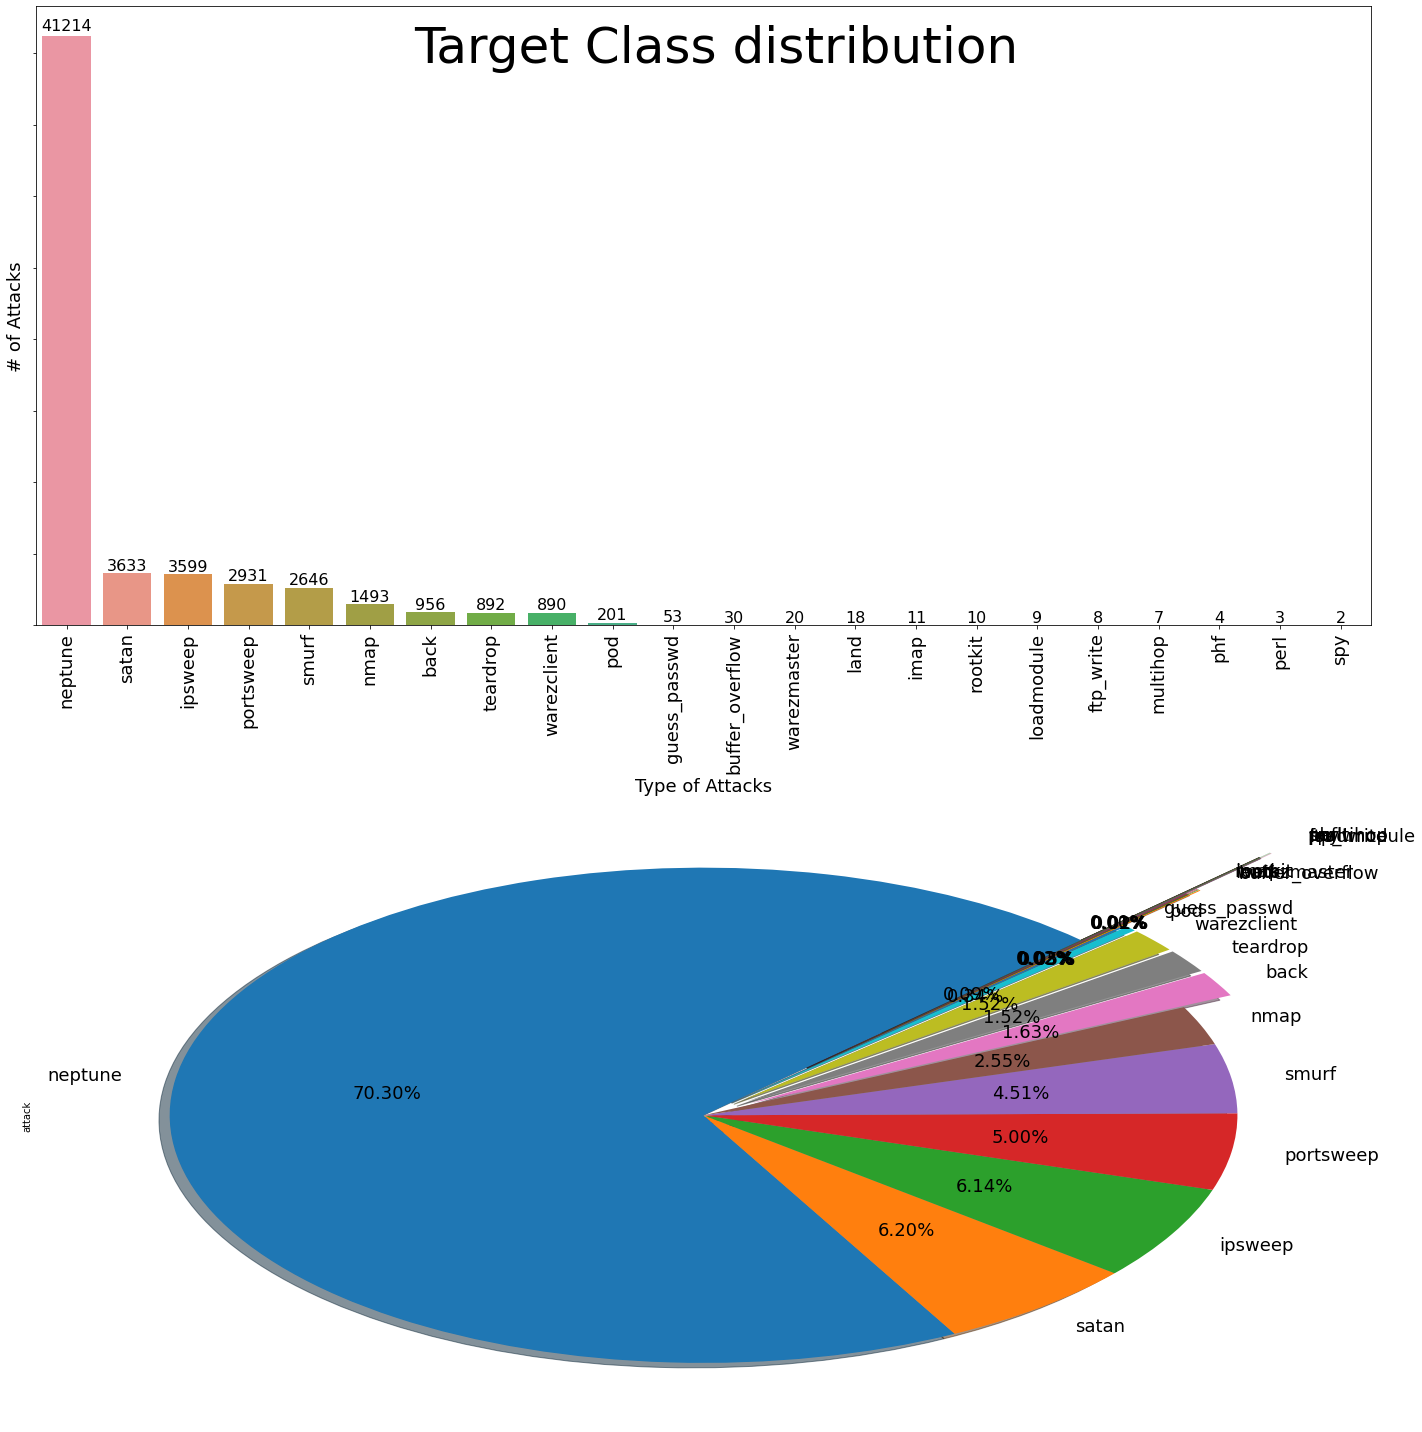

In [ ]:
# Check Attack Class Density in Train data
check_attack_class_density(df)

In [ ]:
##### Neptune is most common type of attack - 70%
##### Spy is least common type of attack - 0.02%

#### Analysis of protocol_type Vs Attack/No Attack Scenario


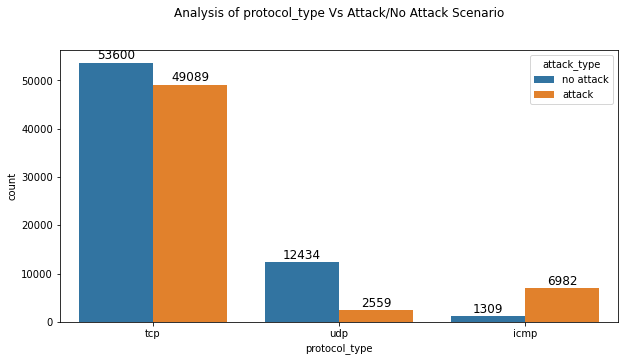

In [ ]:
fig , ax =  plt.subplots( 1,1 , figsize = (10,5))
plt.title('Analysis of protocol_type Vs Attack/No Attack Scenario\n\n', loc = 'center', pad =1.0)

sns.countplot(x = 'protocol_type', data = df_eda , hue = 'attack_type')
autoLabel( ax, fontsize=12)
plt.show()

##### TCP is most commly used protocl type used in network communication, 
##### ICMP packets were higher in case of attack scenario as compared to no attack scenario

#### Analysis of Wrong fragment counts in case of Attack and No Attack scenario

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


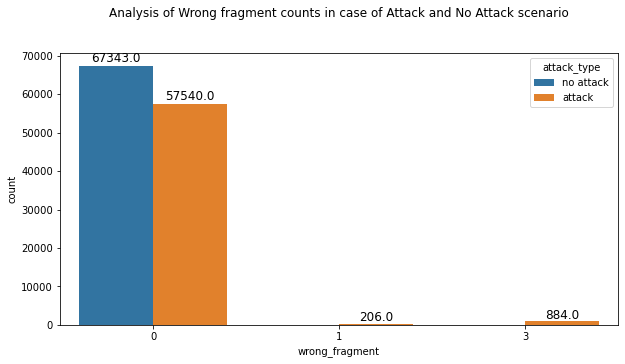

In [ ]:
#### Analysis of Netwrok Error in case of Attack and No Attack scenario

fig , ax =  plt.subplots( 1,1 , figsize = (10,5))
plt.title('Analysis of Wrong fragment counts in case of Attack and No Attack scenario\n\n')
sns.countplot(x = 'wrong_fragment', data = df_eda , hue = 'attack_type')
autoLabel( ax, fontsize=12)
plt.show()

##### Wrong fragments are seen only when there is a attack scenario

#### Analysis of Netwrok Error in case of Attack and No Attack scenario


posx and posy should be finite values
posx and posy should be finite values


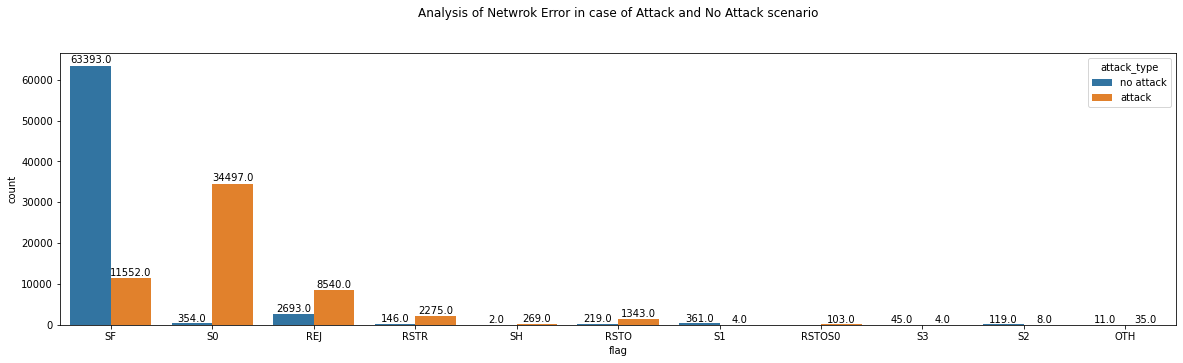

In [ ]:

fig , ax =  plt.subplots( 1,1 , figsize = (20,5))
plt.title('Analysis of Netwrok Error in case of Attack and No Attack scenario\n\n')
sns.countplot(x = 'flag', data = df_eda , hue = 'attack_type')
autoLabel( ax, fontsize=10)
plt.show()

##### SF was most common error in no-attack scenario
##### S0 was most common error in attack scenario

#### Analysis of HOT Login in case of Attack and No Attack scenario


posx and posy should be finite values
posx and posy should be finite values


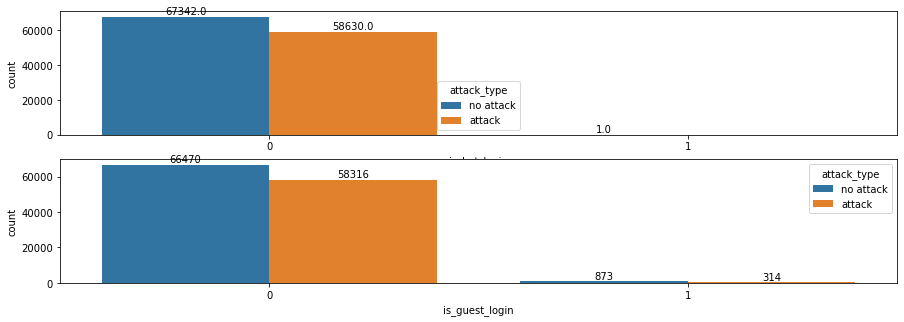

In [ ]:
fig , ax =  plt.subplots( 2,1 , figsize = (15,5))
# plt.title('Analysis of HOT Login in case of Attack and No Attack scenario\n\n')
sns.countplot(x = 'is_hot_login', data = df_eda , hue = 'attack_type' , ax =  ax[0])
sns.countplot(x = 'is_guest_login', data = df_eda , hue = 'attack_type', ax = ax[1])
autoLabel( ax[0], fontsize=10)
autoLabel( ax[1], fontsize=10)
plt.show()

##### There are are very few attack scenarios where 'root' or 'guest'  login was used for attack. Normally attack was done using valid user login only.

#### Analysis of access to root in case of Attack and No Attack scenario

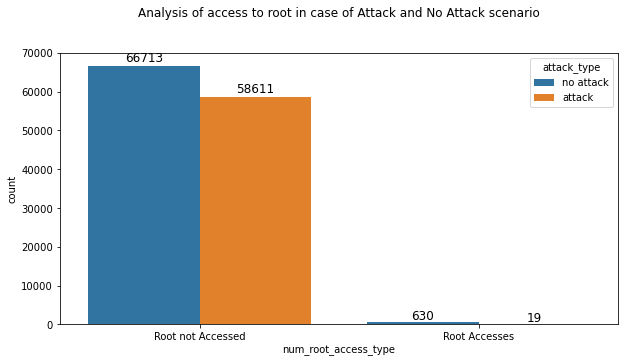

In [ ]:
# Add a column similar to 'root_access' with values into either "Root Accessed"  or "Root not Accessed"

def compute_root_access_type(x):
    if x['num_root']!=0:
        return 'Root Accesses'
    return 'Root not Accessed'

df_eda['num_root_access_type'] = df_eda.apply( lambda x: compute_root_access_type(x), axis =1 )
df_eda['num_root_access_type'].value_counts()

fig , ax =  plt.subplots( 1,1 , figsize = (10,5))
plt.title('Analysis of access to root in case of Attack and No Attack scenario\n\n')
sns.countplot(x = 'num_root_access_type', data = df_eda , hue = 'attack_type')
autoLabel( ax, fontsize=12)

plt.show()

#### Analysis of Duration of Network connection in case of Attack and No Attack scenario


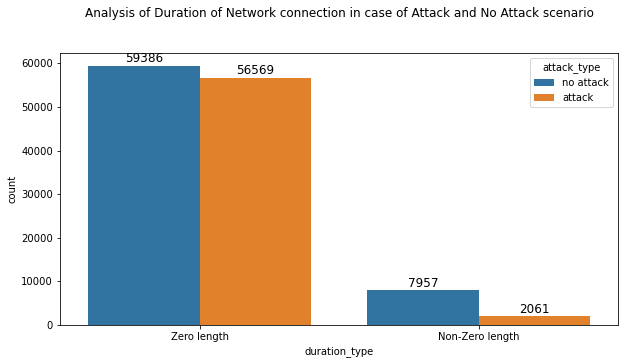

In [ ]:
# Add a column similar to 'duration' with values into either "Non-Zero lengt"  or "Zero lengt"

def compute_duration_type(x):
    if x['duration']!=0:
        return 'Non-Zero length'
    return 'Zero length'

df_eda['duration_type'] = df_eda.apply( lambda x: compute_duration_type(x), axis =1 )
df_eda['duration_type'].value_counts()

fig , ax =  plt.subplots( 1,1 , figsize = (10,5))
plt.title('Analysis of Duration of Network connection in case of Attack and No Attack scenario\n\n')
sns.countplot(x = 'duration_type', data = df_eda , hue = 'attack_type')
autoLabel( ax, fontsize=12)

plt.show()

## *Drop unwanted columns*

In [ ]:
# From Panda profiling, we found that there is a column with all the values are same.
# Below code is to find if max and min of a column is same then it contains all same values
# And we have decided to drop such columns, becasue it will cause no impact on the target variable
# becasue there is no change in value of this column for different values of target variable

def drop_cols_with_equal_min_max(DF) :
  df_t = DF.describe().T
  drop_cols = df_t[df_t['min'] == df_t['max']].index.to_list()
  print('No. of colums with all value to be same - {} , {} '.format( len(drop_cols), str(drop_cols) )   )
  if (len(drop_cols) is not 0) :
    DF.drop(columns = drop_cols, inplace = True ) 


In [ ]:
drop_cols_with_equal_min_max(df)
drop_cols_with_equal_min_max(df_test)


No. of colums with all value to be same - 1 , ['num_outbound_cmds'] 
No. of colums with all value to be same - 1 , ['num_outbound_cmds'] 


In [ ]:
target_cols = 'attack'
feature_cols = df.drop(columns = target_cols).columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

## Check and Remove correlation b/w Columns

### Checking the co-relation between the Xs

In [ ]:
# Checking the co-relation between the Xs
def plot_correlated_cols(DF) :
  fig, ax = plt.subplots (1,1, figsize = (30,30) )
  fig.suptitle('Correlation Matrix', fontsize=50) # Add the text/suptitle to figure
  sns.heatmap( DF, annot=True ,  cmap = 'YlGnBu',  fmt='.2g', square= True )
  plt.show()

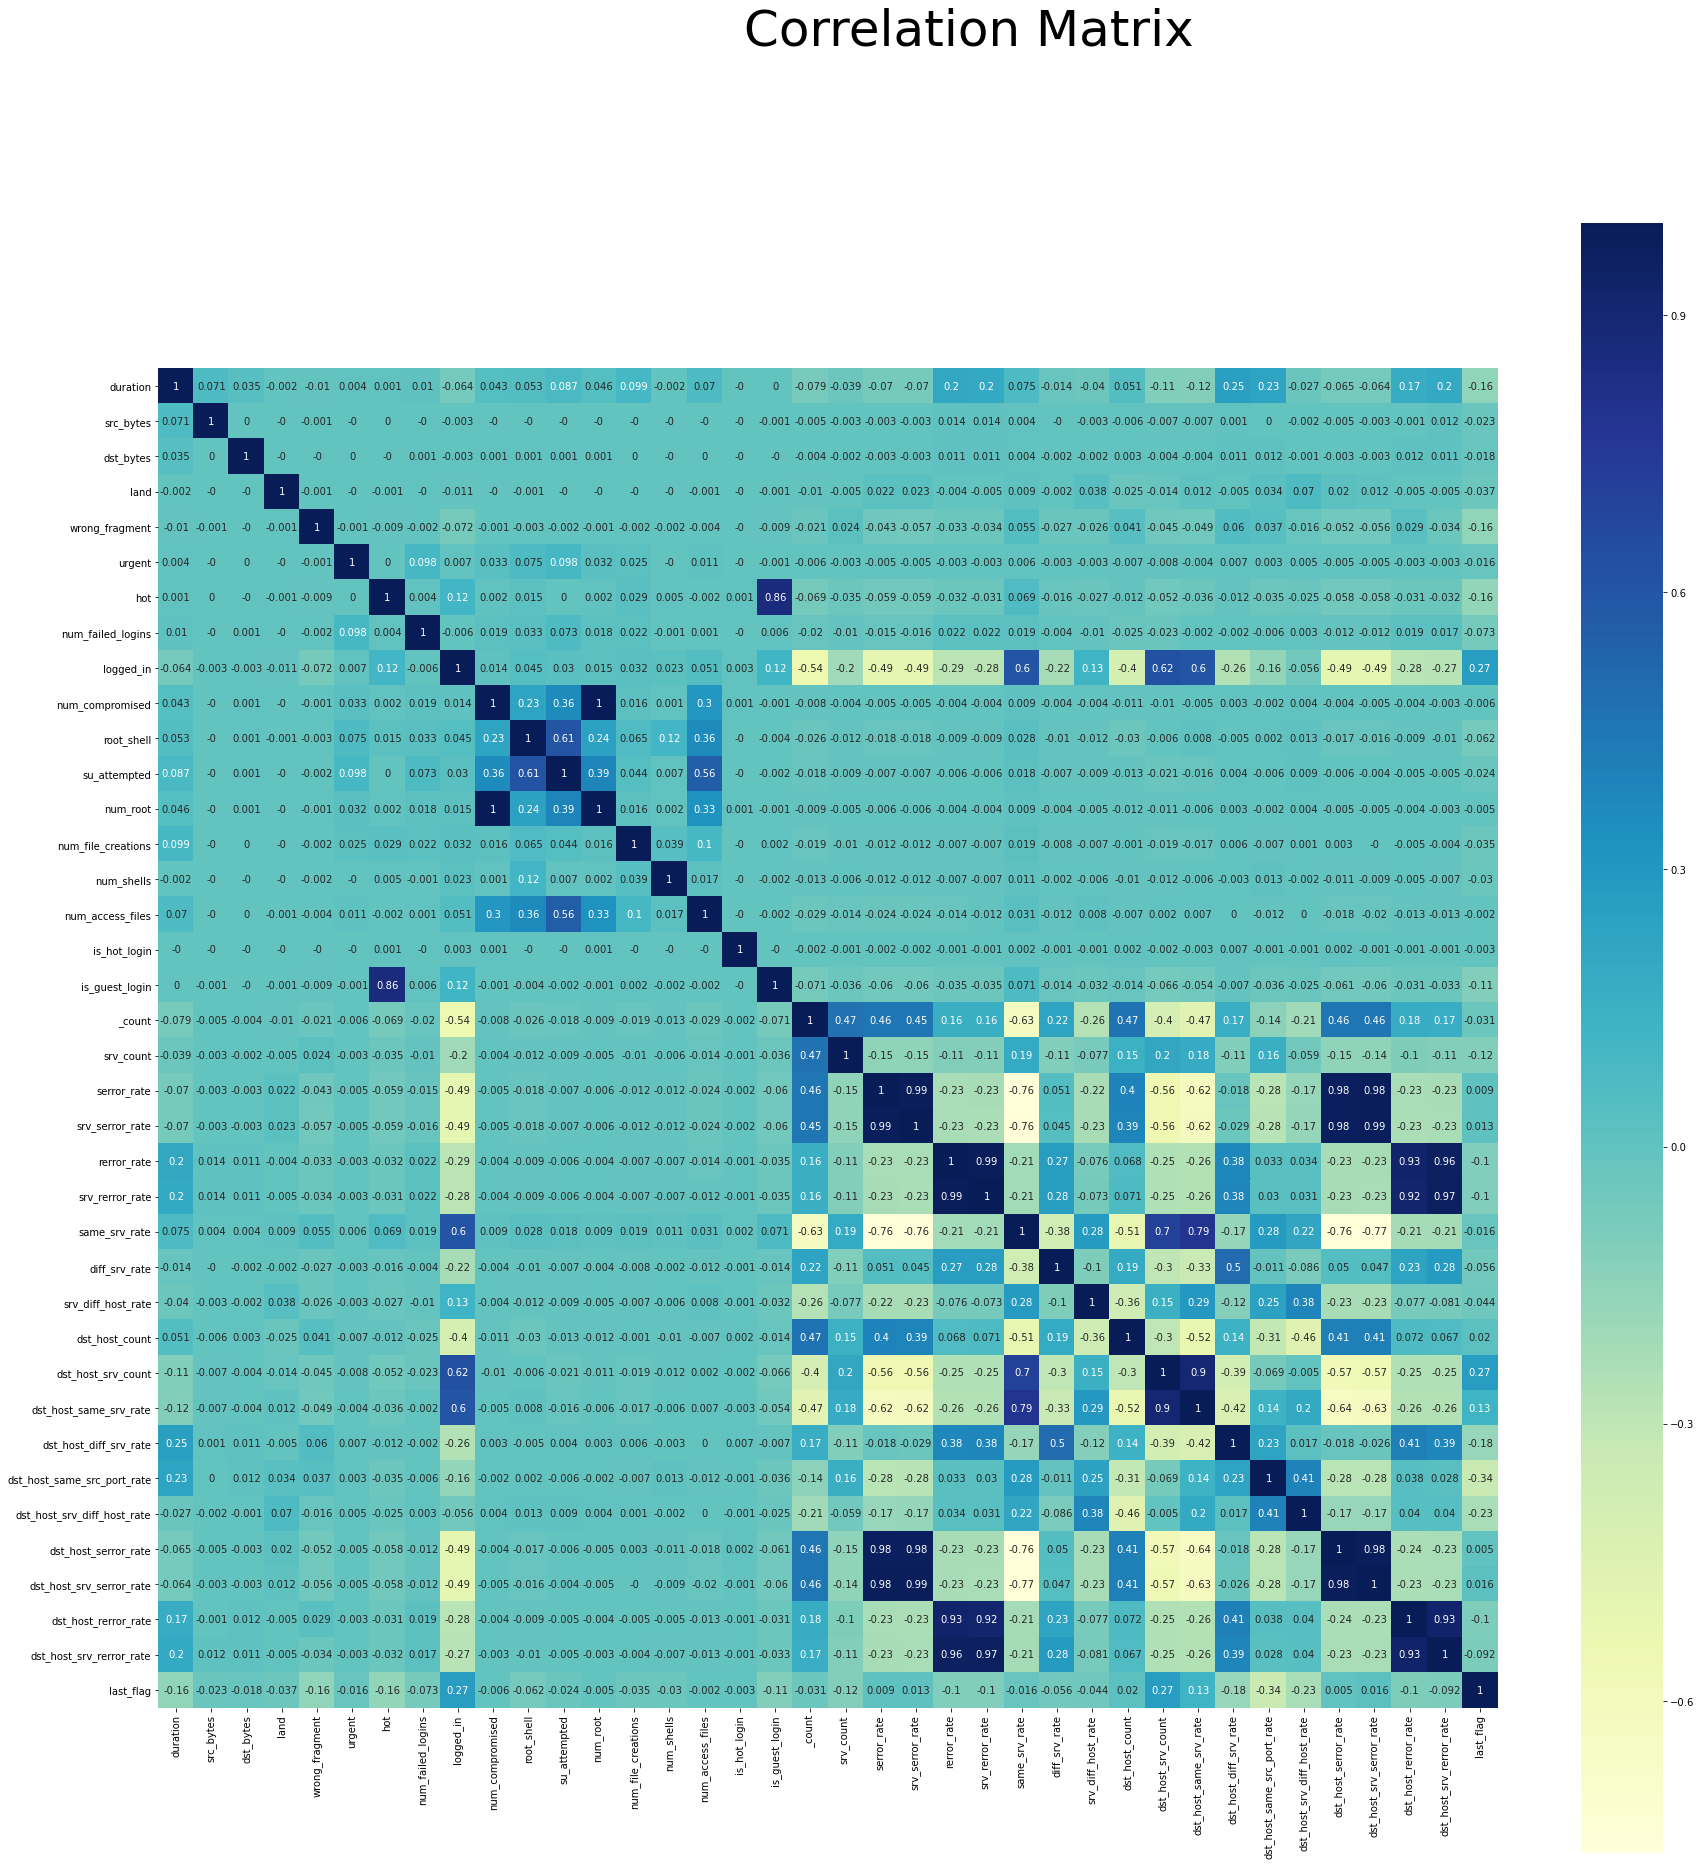

In [ ]:
plot_correlated_cols(round( df.corr() , 3 ))


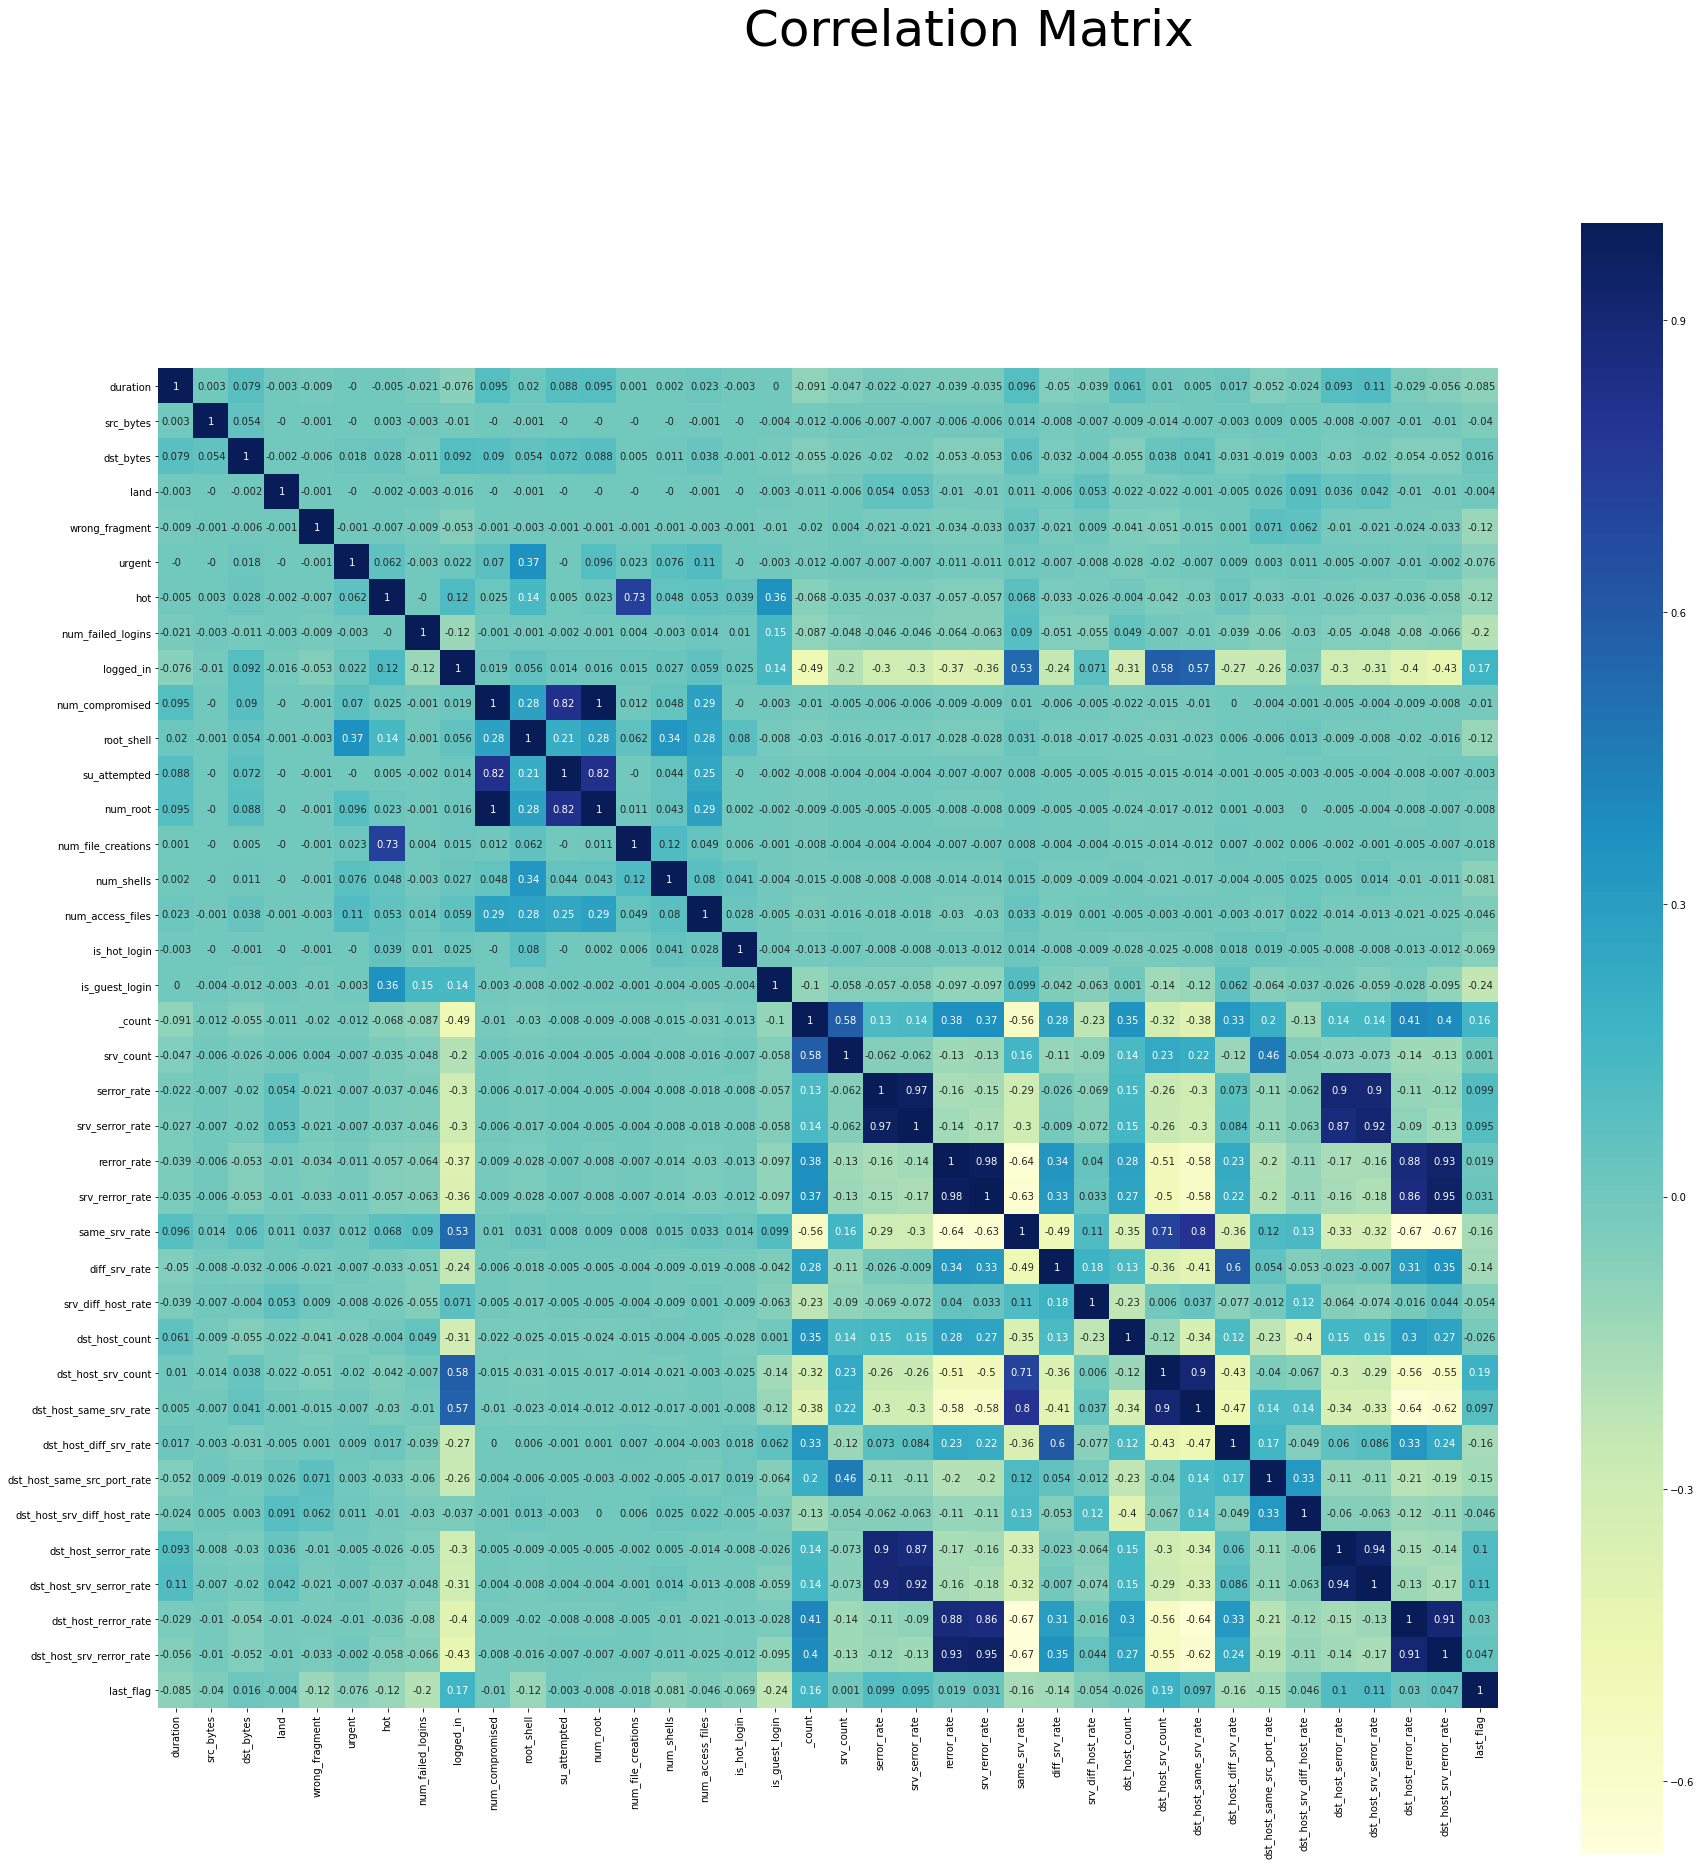

In [ ]:
plot_correlated_cols(round( df_test.corr() , 3 ))


#### Visualize co-related feature with relation > 0.7


In [ ]:
# returns correlated Matrix, with 1 representing corelation and 0- indicated no corelation, 
# criteria of corelation is threshold_value of corelation, is corelation value > threshold_value then cols are said to be corelated 
def corelated_feature_matrix(DF, threshold_value=0.7) :
  corr = round( DF.corr() , 3 )
  corr1 = np.where(( abs(corr)  > threshold_value), 1, 0)
  df_corr =  pd.DataFrame( corr1, columns = corr.columns, index = corr.columns)
  return df_corr


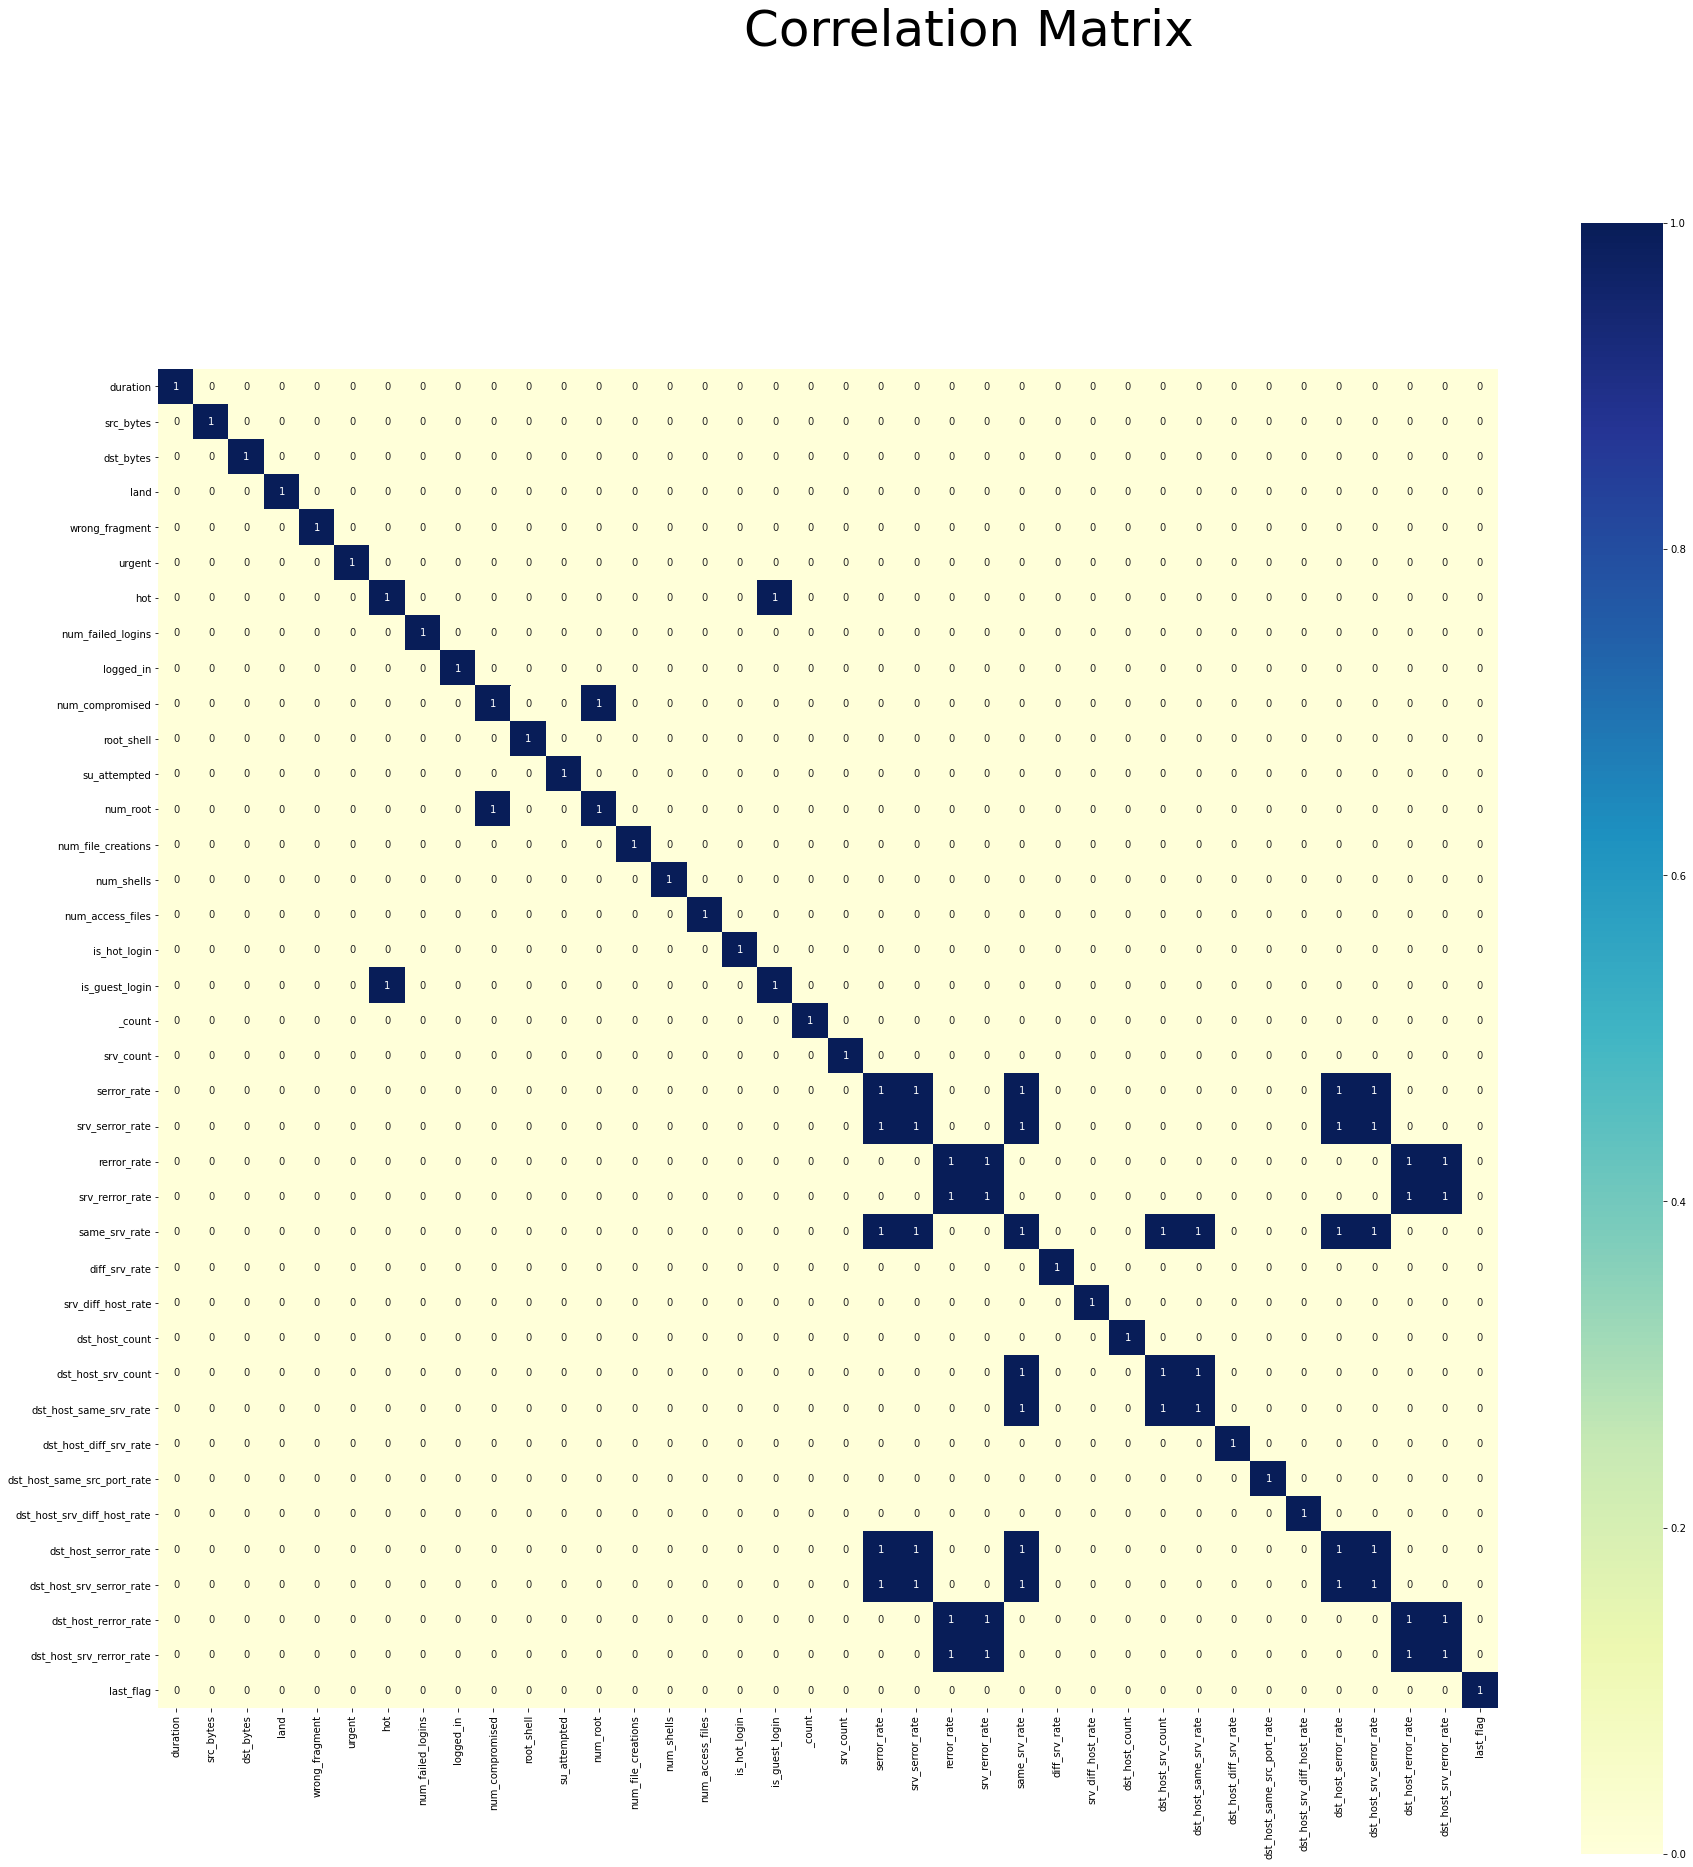

In [ ]:
df_corr = corelated_feature_matrix(df, threshold_value=0.7) 
plot_correlated_cols(df_corr)

#### Compute list of co-related columns to be dropped

In [ ]:
# returns list of corelated columns which we can drop
# input is correlated matrix
def compute_corelated_cols(DF):
  dict = {}
  # iterate over all the columns to find out others which are correlated > 0.7,  as per corrlation matrix
  for c in DF.columns:
      l = DF.index[df_corr[c] == 1].tolist()
      l.remove(c)  #  remove slef column from the list
  #     print(l)
      if len(l) :
          dict[c] = set(l)

  drop_set = set()
  for e in dict:
  #     print(e , dict[e] , drop_set)
      if e not in drop_set :  
          drop_set = drop_set.union(dict[e])

  print("No. of corelated columns needs to be dropped  are  {}\n{}".format(len(drop_set), str(drop_set)))
  return drop_set

#### dropping of columns

In [ ]:
# computing list of columns which needs to be dropped
drop_cols = compute_corelated_cols(df_corr)

# Drop columns from Train and Test DataSet
df.drop( columns= drop_cols , inplace = True)
df_test.drop( columns= drop_cols , inplace = True)

No. of corelated columns needs to be dropped  are  10
{'dst_host_same_srv_rate', 'dst_host_serror_rate', 'num_root', 'srv_serror_rate', 'srv_rerror_rate', 'is_guest_login', 'dst_host_srv_rerror_rate', 'same_srv_rate', 'dst_host_rerror_rate', 'dst_host_srv_serror_rate'}


#### plot corelated columns after dropping

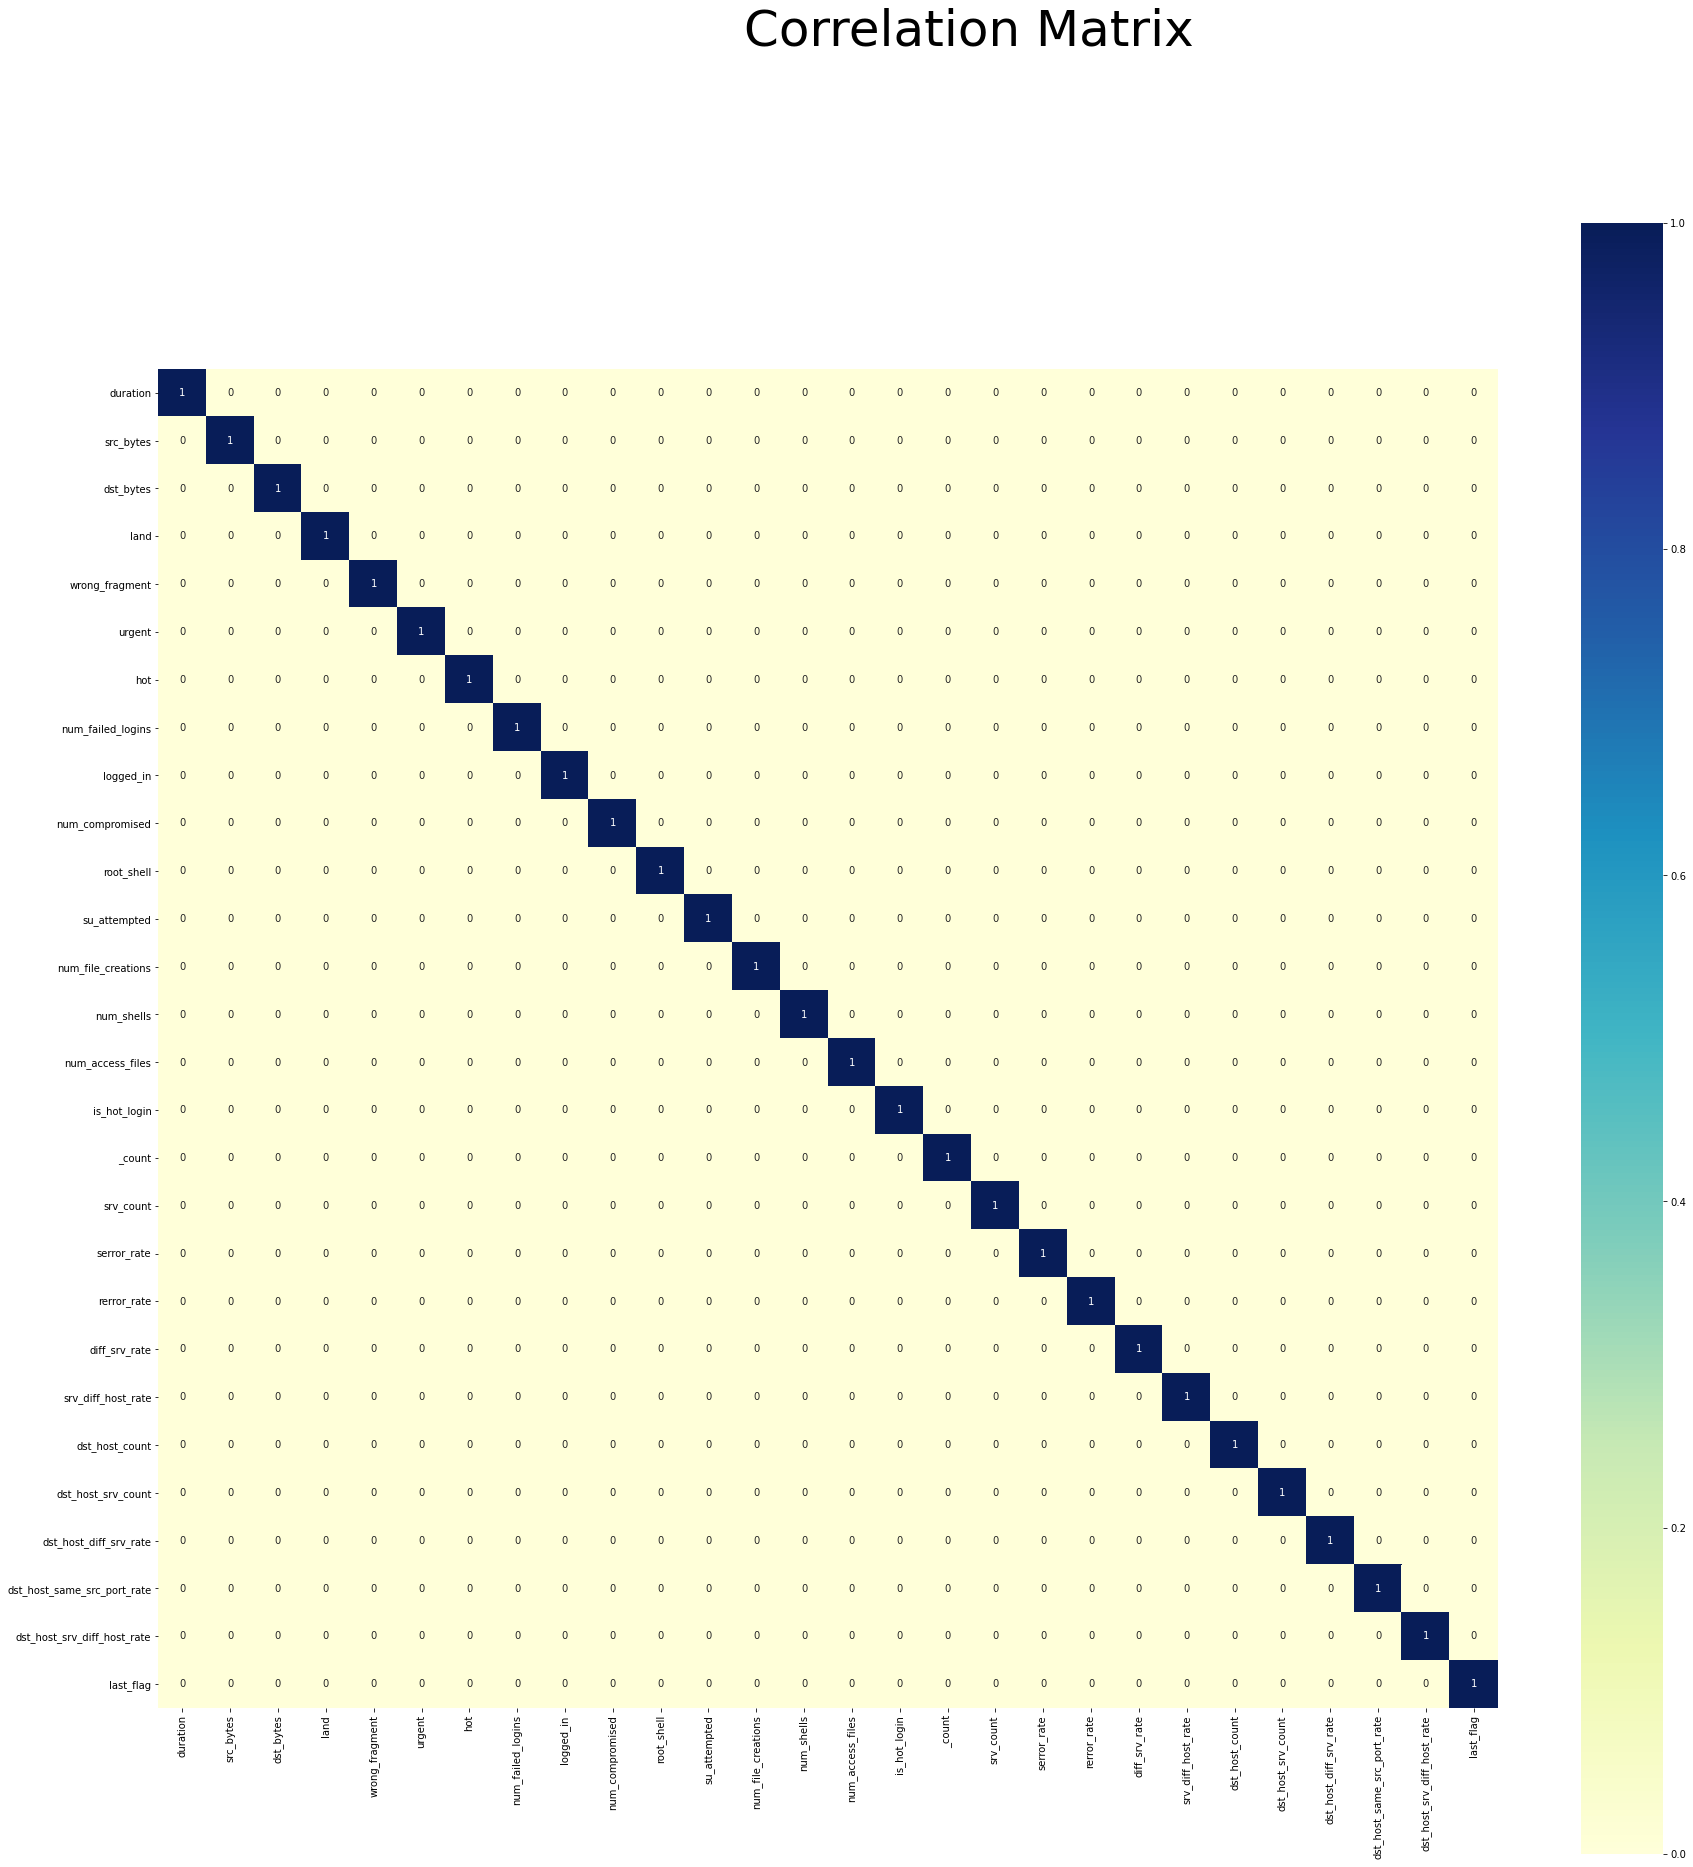

In [ ]:
df_corr = corelated_feature_matrix(df, threshold_value=0.7) 
plot_correlated_cols(df_corr)

## *Encode the Data*
######  refer :: https://pbpython.com/categorical-encoding.html

In [ ]:
df_train = df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

### encoding binary columns

In [ ]:
# encoding binary columns
def encoding_binary_cols(DF, binary_cols):
    DF[binary_cols] = DF[binary_cols].astype('int8')

binary_cols = ['land', 'logged_in', 'root_shell', 'is_hot_login', 'su_attempted']
encoding_binary_cols(df, binary_cols)
encoding_binary_cols(df_test, binary_cols)

# df_train[binary_cols].info()

### encoding categorical columns

In [ ]:
# encoding categorical columns
def encoding_categorical_cols(DF , categorical_cols):
    from sklearn.preprocessing import LabelEncoder

    lb_make = LabelEncoder()

    for c in categorical_cols :
        DF[c] = lb_make.fit_transform(DF[c])

categorical_cols = ['protocol_type', 'service', 'flag']
encoding_categorical_cols(df, categorical_cols)
encoding_categorical_cols(df_test, categorical_cols)

### encoding 'attack' columns

In [ ]:

#  encode 'normal' attack as 0 , i.e Fasle  and othere attacks as True attack
def encoding_target_cols(DF , target_cols):
    # Below code converts a multiclass categorical column into a binary col, where replace 'normal' with Flase and rest with True
    DF[target_cols+'_code'] = np.where(DF[target_cols].str.contains("normal"), False, True)
    DF[target_cols]      = DF[target_cols].astype('category')
    DF[target_cols+'_type'] = DF[target_cols].cat.codes

target_cols = 'attack'
encoding_target_cols(df_train , target_cols)
encoding_target_cols(df_test , target_cols)


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   duration                     22544 non-null  int64   
 1   protocol_type                22544 non-null  int32   
 2   service                      22544 non-null  int32   
 3   flag                         22544 non-null  int32   
 4   src_bytes                    22544 non-null  int64   
 5   dst_bytes                    22544 non-null  int64   
 6   land                         22544 non-null  int8    
 7   wrong_fragment               22544 non-null  int64   
 8   urgent                       22544 non-null  int64   
 9   hot                          22544 non-null  int64   
 10  num_failed_logins            22544 non-null  int64   
 11  logged_in                    22544 non-null  int8    
 12  num_compromised              22544 non-null  int64   
 13  r

## *Dimensionality reduction*

### Feature Selection - by Random Forest

In [ ]:
target_cols = ['attack', 'attack_code'  , 'attack_type']
feature_cols = df.drop(columns = target_cols).columns
len(df_train.columns)

34

In [ ]:

def plot_important_cols(DF, col , imp, min_importance_value = 0.02):
    fig = plt.figure(figsize = (20,10))
    fig.suptitle(' Feature Importance Chart', fontsize=50) # Add the text/suptitle to figure

    ax = sns.barplot(col , imp )
    ax.set_xlabel(" Columns ", fontsize=18)
    ax.set_ylabel(" Columns relative importance", fontsize=20)
    ax.set_xticklabels(col, rotation=90, fontsize=20)

    ax.grid(b=True, which='both', color='b', linestyle='-')
    ax.grid(b=True, which='minor', color='r', linestyle=':')
    ax.minorticks_on()
    ax.set_axisbelow(True)

    ax.axhline(min_importance_value, color = 'red')
    ax.text(-3, min_importance_value + 0.01, "Minimum threshold importance value\n for feature selection ",color = 'red', fontsize=20)
    plt.show()

# feature selection by Random Forest
def compute_important_cols(DF, min_importance_value = 0.02, plot = False):
    X =  DF[feature_cols]
    Y =  DF['attack_code']
    model = RandomForestClassifier(random_state=123, max_depth=20)
    model.fit(X,Y)
    imp = model.feature_importances_ 

    imp_features = []
    for i, f in zip(imp, feature_cols):
        if i > min_importance_value :
            imp_features.append(f)
    print ("Out of {} features based on relative importance = {} selecting {} features".format (len(feature_cols), min_importance_value,  len (imp_features)))
    if( plot ):
        plot_important_cols(DF, X.columns , imp)
    return imp_features




imp_cols = compute_important_cols(df_train, min_importance_value = 0.02, plot=False)

Out of 31 features based on relative importance = 0.02 selecting 13 features


## Detecting outliers and handling them :   TBD

## Pair plots for all features

['serror_rate', 'last_flag', 'dst_host_same_src_port_rate', 'dst_host_srv_count', '_count', 'dst_host_diff_srv_rate', 'dst_bytes', 'src_bytes', 'diff_srv_rate']


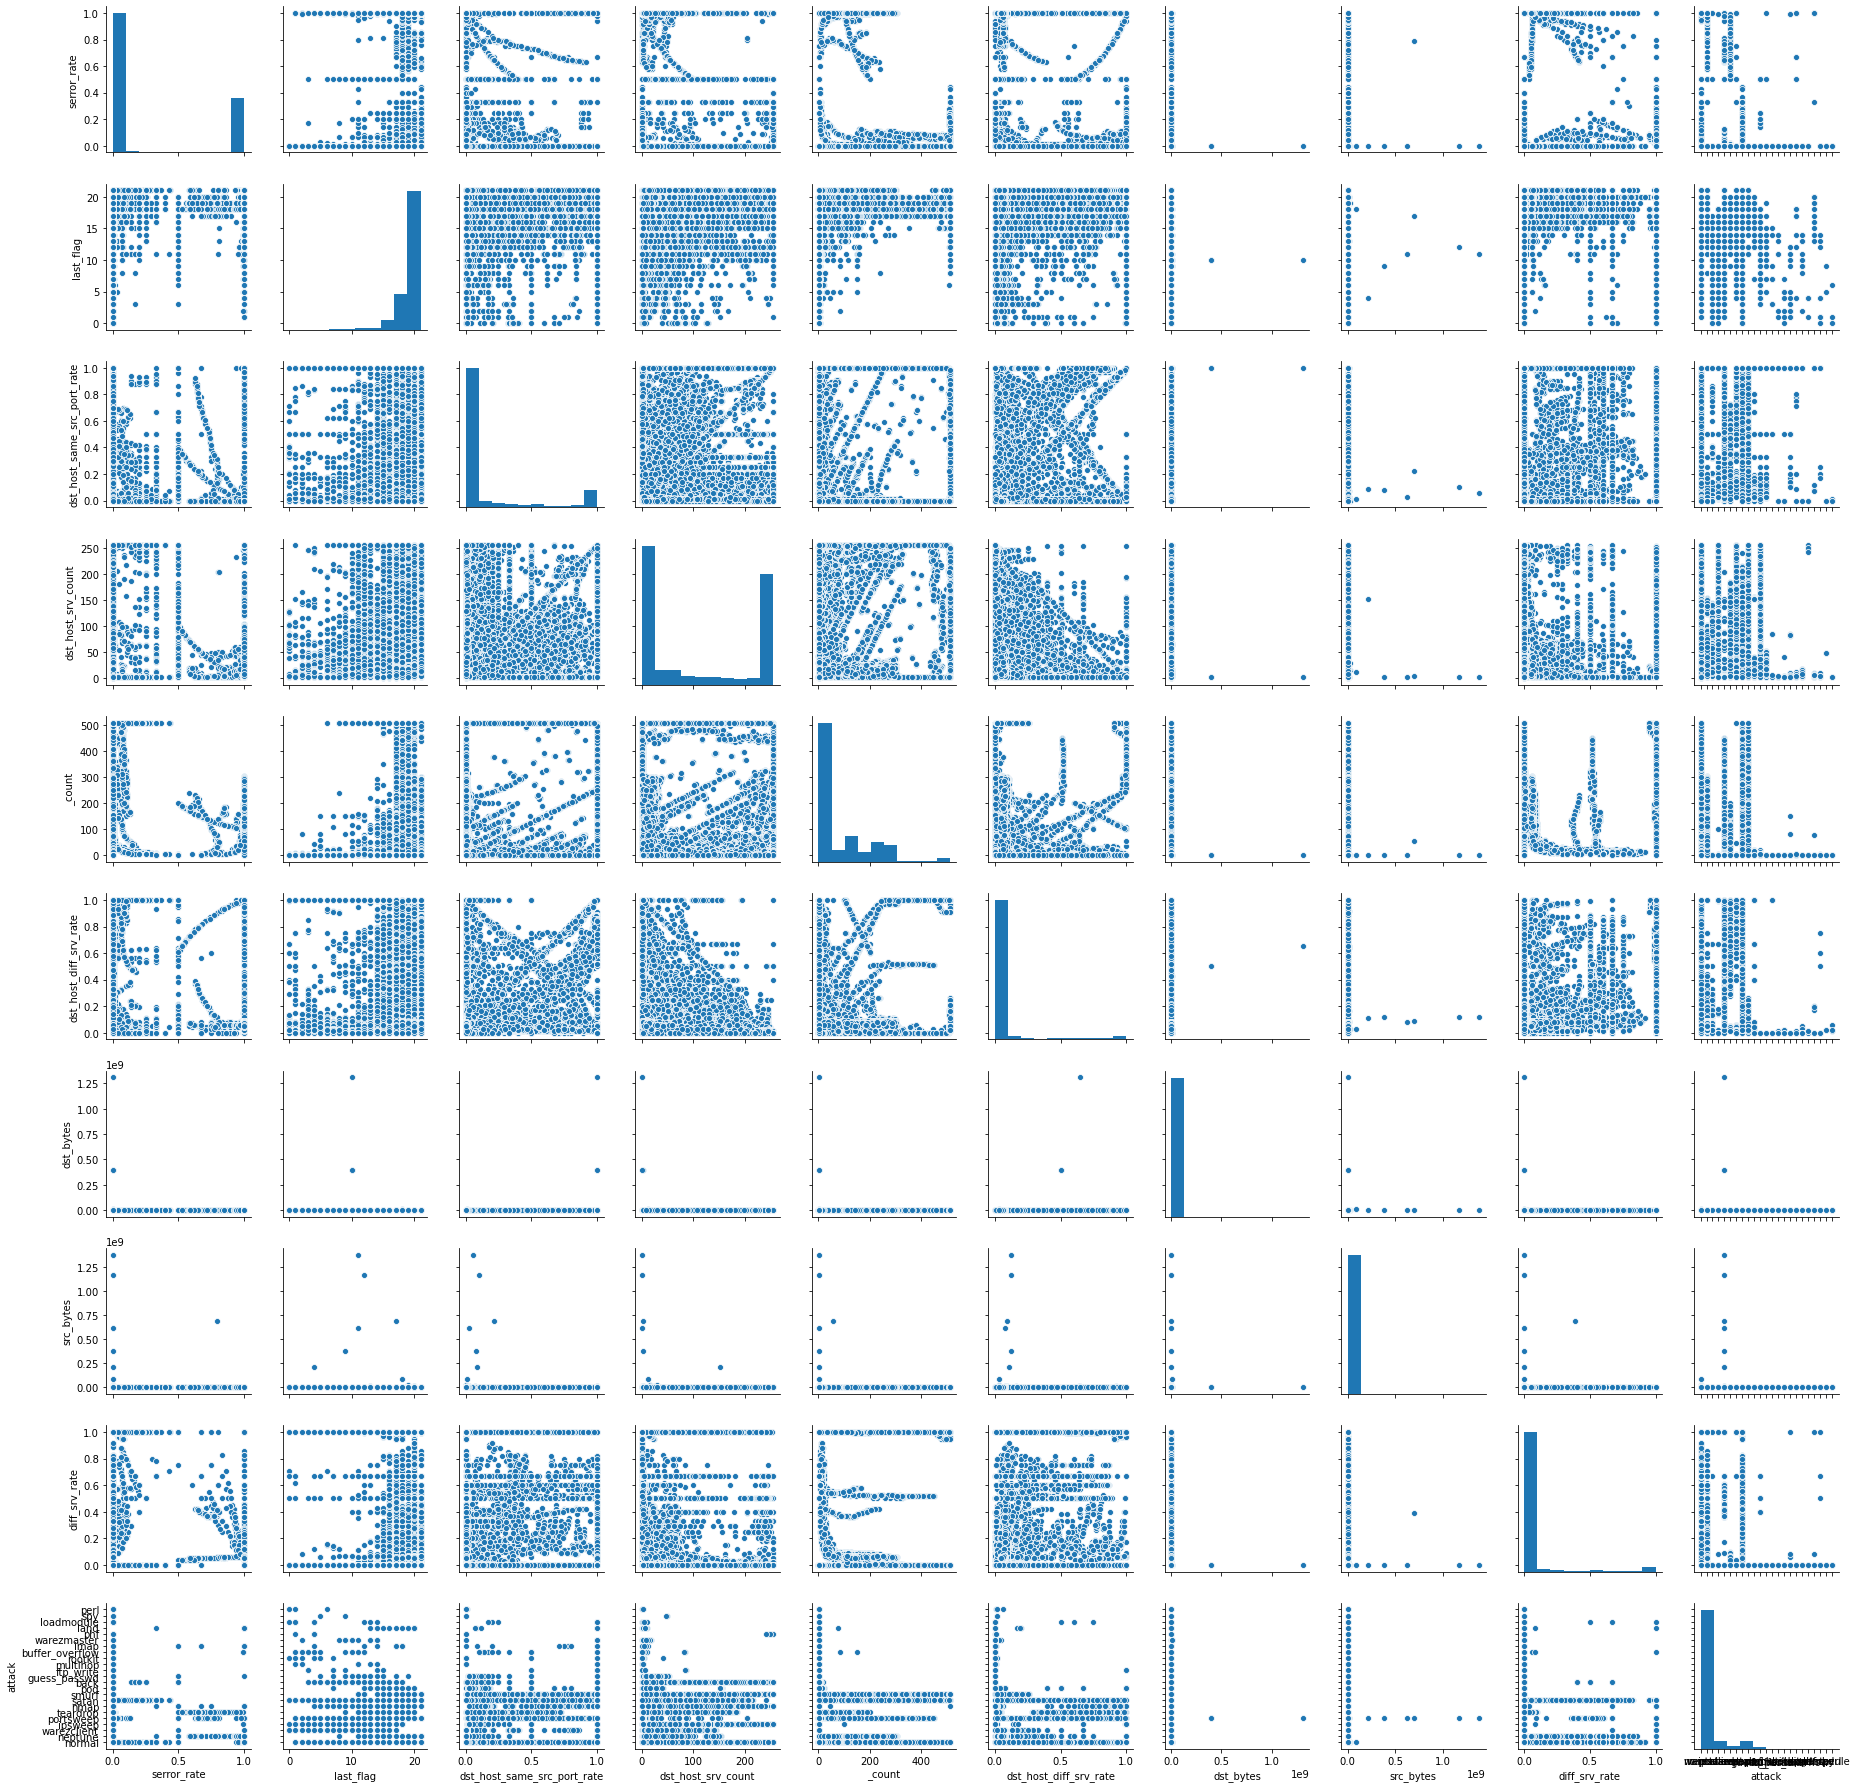

In [ ]:
# numerical columns
# Here we are removing 'binary columns' and categorical columns' from important cols
cols =  list ( set(imp_cols) -  set(binary_cols) -  set(categorical_cols))
print(cols)
g = sns.pairplot(df, vars = cols + ['attack'])

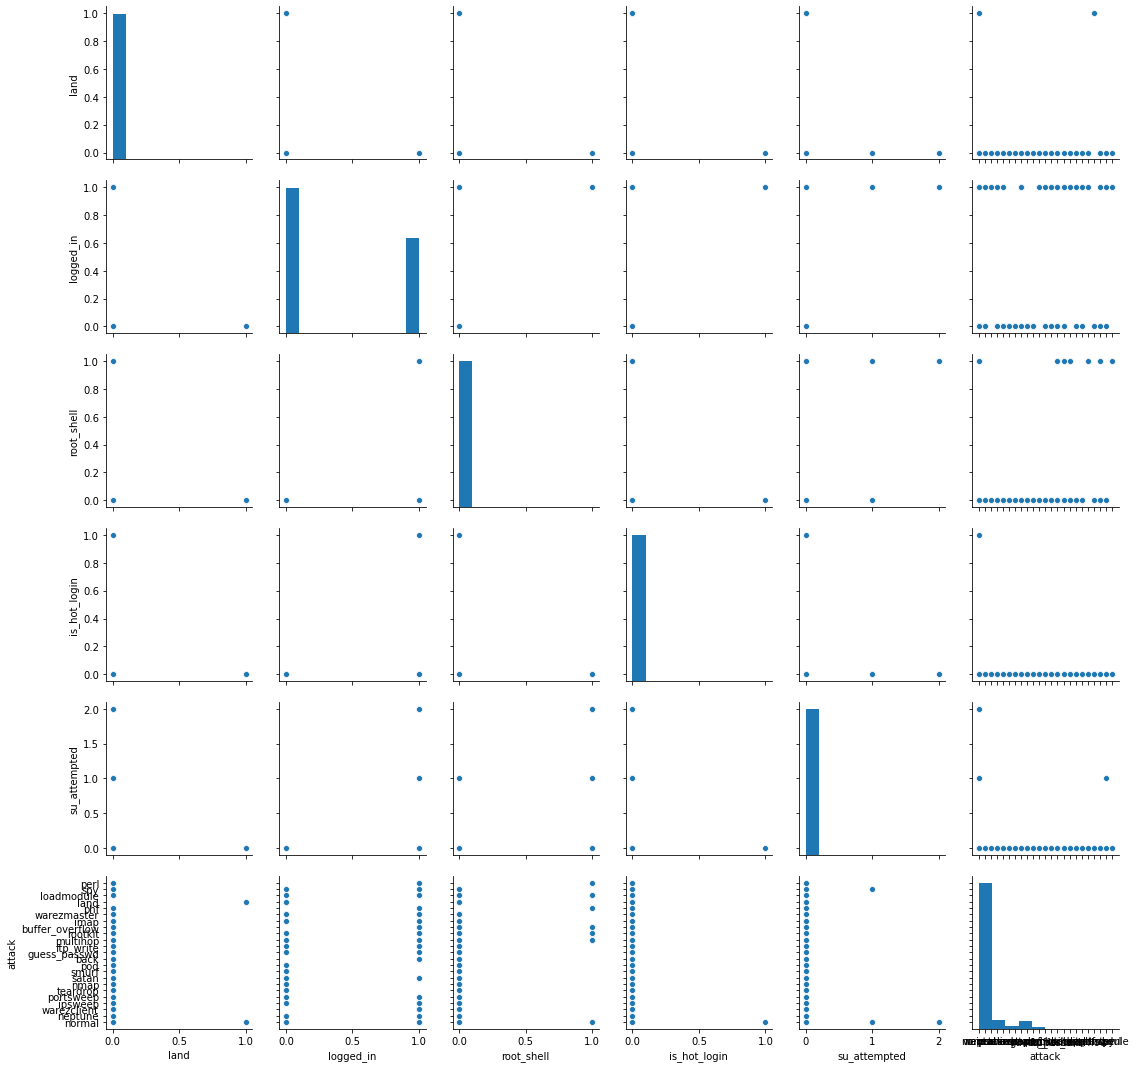

In [ ]:
# binary columns
g = sns.pairplot(df, vars =  binary_cols + ['attack'])

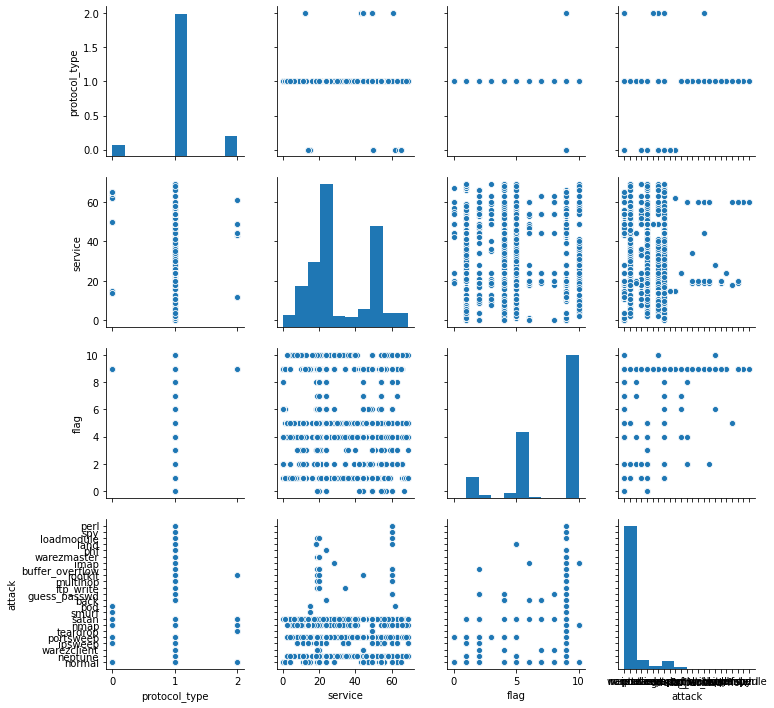

In [ ]:
# categorical columns
g = sns.pairplot(df, vars =  categorical_cols + ['attack'])

### Normalize the test and train data

In [ ]:
from sklearn import preprocessing

def scaleData(DF):
    scl  = preprocessing.MinMaxScaler(feature_range=(0,1))
    arr_scld = scl.fit_transform(DF)
    d_scld = pd.DataFrame(arr_scld)
    d_scld.columns = DF.columns
#     print(d_scld.describe())
    return d_scld

In [ ]:
# feature_cols = df_train.drop(columns = ['attack', 'attack_code', 'attack_type']).columns
df_train_scaled = scaleData( df[feature_cols])
df_test_scaled  = scaleData( df_test[feature_cols])


In [ ]:
df_train_scaled.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,serror_rate,rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,last_flag
count,125973.000000,125973.000000,125973.000000,125973.000000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,0.006692,0.526601,0.452558,0.698000,3.302024e-05,1.509928e-05,0.000198,0.007562,0.000037,0.002655,...,0.284485,0.119958,0.063053,0.097322,0.714310,0.453541,0.082951,0.148379,0.032542,0.928765
std,0.060700,0.213310,0.236905,0.268936,4.253974e-03,3.069818e-03,0.014086,0.084510,0.004789,0.027922,...,0.446456,0.320436,0.180314,0.259830,0.389044,0.434128,0.188922,0.308997,0.112564,0.109119
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.289855,0.500000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.321569,0.039216,0.000000,0.000000,0.000000,0.857143
50%,0.000000,0.500000,0.347826,0.900000,3.188489e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.247059,0.020000,0.000000,0.000000,0.952381
75%,0.000000,0.500000,0.710145,0.900000,2.000052e-07,3.939120e-07,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.060000,0.000000,1.000000,1.000000,0.070000,0.060000,0.020000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process, metrics


In [ ]:
imp_cols

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'logged_in',
 '_count',
 'serror_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'last_flag']

In [ ]:
Target = ['attack_code']
X_train = df_train_scaled[imp_cols]
Y_train = df_train[Target].copy().values.ravel()
X_test = df_test_scaled[imp_cols]
Y_test = df_test[Target].copy().values.ravel()

In [ ]:
# Helper Class for Initilizing GridSearch
from sklearn.model_selection import GridSearchCV


# name of the columns of the data frame which captures all the data of all algorithms
MLA_Name = 'MLA Name'
MLA_Param = 'MLA Parameters'
MLA_Train_Accuracy = 'MLA Train Accuracy'
MLA_Validation_Accuracy = 'MLA Validation Accuracy'
MLA_Validation_STD = 'MLA Validation Accuracy 3*STD'
MLA_Test_Accuracy = 'MLA Test Accuracy'
MLA_Time = 'MLA Time'

class EstimatorSelectionHelper:

    def __init__(self):

        self.models = {}
        self.params = {}
        self.grid_searches = {}
        self.best_params = {}
        self.feature_importance = {}
        self.FeatureImportanceAlgo = ['DecisionTreeClassifier','RandomForestClassifier','ExtraTreesClassifier','GradientBoostingClassifier']
        self.MLA = pd.DataFrame(columns = [MLA_Name, MLA_Param, MLA_Time, MLA_Train_Accuracy, MLA_Validation_Accuracy, MLA_Test_Accuracy])


    def score(self, X_test, Y_test):
        df = self.MLA
        for k in self.grid_searches:
            print(k)
            algo = self.grid_searches[k]
            df.loc[ df[MLA_Name]== k , MLA_Test_Accuracy] = algo.score(X_test, Y_test)
        return self.MLA
    
    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=True):
        if not set(self.models.keys()).issubset(set(self.params.keys())):
            missing_params = list(set(self.models.keys()) - set(self.params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
            
        for key in self.models.keys():
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs  
            self.best_params[key]  = str(gs.best_params_)
            if key in self.FeatureImportanceAlgo:
                self.feature_importance[key]= gs.best_estimator_ .feature_importances_
                

            # print (gs.best_params_.feature_importances_ )
            # try:
            #   print(gs.best_params_.feature_importances_ )
            #   self.feature_importance[key]= gs.best_params_.feature_importances_ 
            # except AttributeError:
            #   pass

    def imp_features(self):
        d = self.feature_importance
        impDF = pd.DataFrame([d.keys(), d.values()])
        return impDF
    
    def returnBestParamDF(self):
        d = self.best_params
        BestParamDF = pd.DataFrame.from_dict([d.keys(), d.values()]).T
        return BestParamDF

    def add_model_and_params(self, name, model, hyperparam):
        self.models[name] =  model
        self.params[name] = hyperparam
    
    def fit_summary(self):

        arr = []
        for k in self.grid_searches:
            dict= {}
            # print(k)
            algo = self.grid_searches[k]
            dict[MLA_Name] = k
            dict[MLA_Param] = str(algo.best_params_)
            dict[MLA_Time] = np.nanmean( algo.cv_results_['mean_fit_time'])
            dict[MLA_Train_Accuracy] = np.nanmean(algo.cv_results_['mean_train_score'])
            dict[MLA_Validation_Accuracy] = np.nanmean(algo.cv_results_['mean_test_score'], )
            dict[MLA_Test_Accuracy] = 0
            arr.append(dict)
        
        self.MLA = pd.DataFrame(arr)
        return self.MLA

In [ ]:
# Create an Helper Object whcih we will be using for Modeling
helper1 = EstimatorSelectionHelper()

# Add different algos. +  hyperparameter for modeling

# helper1.add_model_and_params('LogisticRegression' , linear_model.LogisticRegression(), { "C":np.logspace(-3,3,7), "penalty":["l1","l2"] } )
helper1.add_model_and_params('DecisionTreeClassifier', tree.DecisionTreeClassifier(),  {'criterion' : ['gini', 'entropy'], 'splitter' : ['random', 'best'], 'max_depth':[2,5,10], 'min_samples_leaf':[2,5,10]})
helper1.add_model_and_params('RandomForestClassifier', ensemble.RandomForestClassifier(), { 'n_estimators': [16, 32] } )
# helper1.add_model_and_params('KNNClassifier', neighbors.KNeighborsClassifier(), { 'n_neighbors': [5,10,15,20], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']} )
# helper1.add_model_and_params('SVC', svm.SVC(),   'SVC': [ {'kernel': ['linear'], 'C': [1, 10]}, {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},     ] )
helper1.add_model_and_params('AdaBoostClassifier', ensemble.AdaBoostClassifier(), { 'n_estimators': [16, 32] })
helper1.add_model_and_params('GradientBoostingClassifier', ensemble.GradientBoostingClassifier(), { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] } )
helper1.add_model_and_params('LinearDiscriminantAnalysis',discriminant_analysis.LinearDiscriminantAnalysis(),  {'solver' : ['svd', 'lsqr', 'eigen'] } )

In [ ]:
# fit the selected algos. with  training data.

cv_split = model_selection.ShuffleSplit(n_splits = 5, test_size = .2, train_size = .8, random_state = 123)
helper1.fit(X_train, Y_train, scoring='f1', n_jobs=-1, cv = cv_split)

Running GridSearchCV for DecisionTreeClassifier.
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   21.8s finished


Running GridSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.0s finished


Running GridSearchCV for AdaBoostClassifier.
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.6s finished


Running GridSearchCV for GradientBoostingClassifier.
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   32.9s finished


Running GridSearchCV for LinearDiscriminantAnalysis.
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.5s finished


In [ ]:
df = helper1.fit_summary()

DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
LinearDiscriminantAnalysis


In [ ]:
helper1.returnBestParamDF()

,0,1
0,DecisionTreeClassifier,"{'criterion': 'entropy', 'max_depth': 10, 'min..."
1,RandomForestClassifier,{'n_estimators': 32}
2,AdaBoostClassifier,{'n_estimators': 32}
3,GradientBoostingClassifier,"{'learning_rate': 1.0, 'n_estimators': 32}"
4,LinearDiscriminantAnalysis,{'solver': 'svd'}


#### Model performance 

In [ ]:
perfDF = helper1.score(X_test, Y_test)

DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
LinearDiscriminantAnalysis


In [ ]:
perfDF.set_index(MLA_Name, inplace=True)

In [ ]:
perfDF

,MLA Parameters,MLA Time,MLA Train Accuracy,MLA Validation Accuracy,MLA Test Accuracy
MLA Name,,,,,
DecisionTreeClassifier,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.250702,0.957249,0.957236,0.811042
RandomForestClassifier,{'n_estimators': 32},3.149585,0.999731,0.998807,0.787601
AdaBoostClassifier,{'n_estimators': 32},3.330101,0.975315,0.975074,0.792108
GradientBoostingClassifier,"{'learning_rate': 1.0, 'n_estimators': 32}",5.450038,0.995803,0.995008,0.785682
LinearDiscriminantAnalysis,{'solver': 'svd'},0.497802,0.946229,0.947297,0.873062


#### Train accuracy is almost same as Validation accuracy, so model is not overfitted. And this model is good for predicting testing 

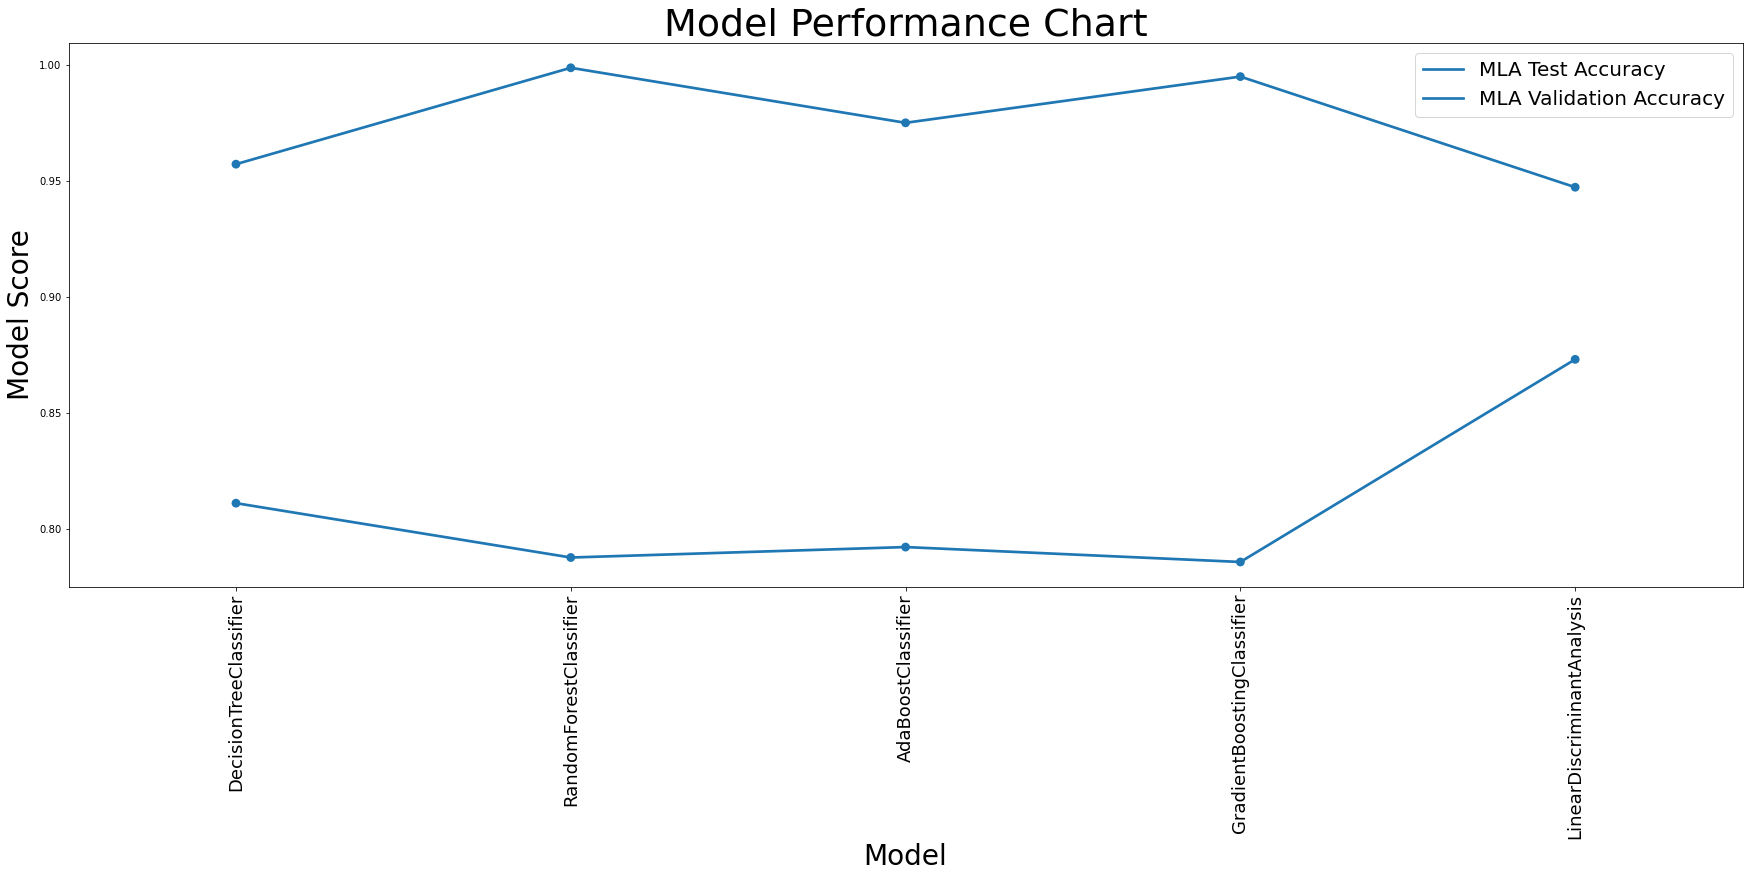

In [ ]:
fig, ax = plt.subplots (1,1, figsize = (30,10) )
cols = [ MLA_Test_Accuracy, MLA_Validation_Accuracy ]
for col in cols :
    sns.pointplot(y= perfDF[col], x=perfDF.index)

ax.set_title('Model Performance Chart', fontsize=38)
ax.set_ylabel('Model Score', fontsize=28)
ax.set_xlabel('Model', fontsize=28)
ax.set_xticklabels(perfDF.index, rotation = 90, fontsize=18)
plt.legend(cols, fontsize = 20)
plt.show();

#### Feature Importance Chart

In [ ]:
impDF = pd.DataFrame(helper1.feature_importance, index = X_train.columns)
impDF

,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier
protocol_type,0.017516,0.068553,0.097890
service,0.030037,0.044594,0.016339
flag,0.484693,0.217142,0.579778
src_bytes,0.007703,0.015489,0.002024
dst_bytes,0.001200,0.005198,0.004884
logged_in,0.000341,0.062947,0.000483
_count,0.038762,0.046973,0.008314
serror_rate,0.005859,0.072107,0.002357
diff_srv_rate,0.012703,0.096167,0.041822
dst_host_srv_count,0.020167,0.174906,0.001344


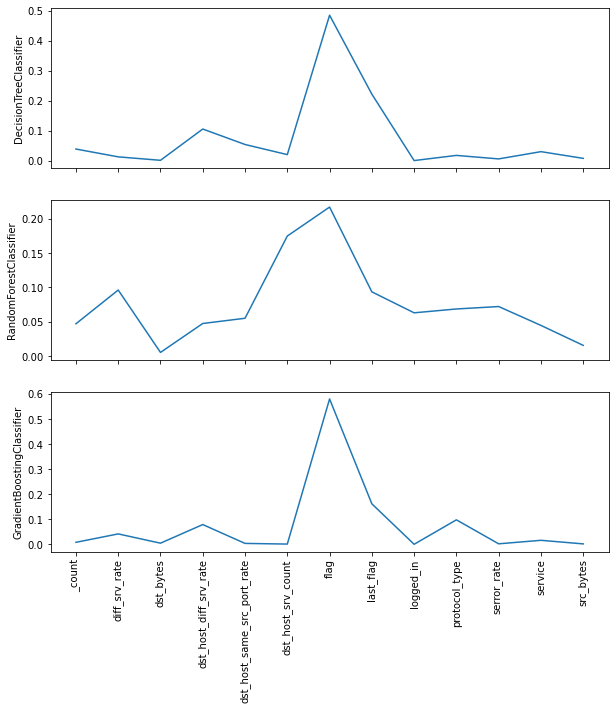

In [ ]:
fig, ax = plt.subplots (3,1, figsize = (10,10) , sharex= True)
for i,col in enumerate(impDF.columns) :
    sns.lineplot(y= impDF[col], x=impDF.index, ax =ax[i])

# ax.set_title('Feature Importance Chart', fontsize=38)
# ax.set_ylabel('Importance Value', fontsize=28)
# ax.set_xlabel('Features', fontsize=28)
# ax.set_xticklabels(impDF.index, rotation = 90, fontsize=18)
# plt.legend(impDF.columns, fontsize = 20)
plt.xticks(rotation=90)
plt.show();